In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') # ignore warnings message

# making all pandas columns visable with display command
pd.set_option('display.max_columns', 500)


# df = pd.read_csv('datasets/EPL_sort.csv', index_col=0)
df = pd.read_csv('datasets/epl_data_train_onehot.csv')
df = df.drop(columns = ['final2'])
# df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id'])
# df = df.drop(columns = ['id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id'])
df

,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP,final1
0,1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,3,0.0
1,1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-9,0.0
2,1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-13,0.0
3,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,4,1.0
4,0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2655,0,0.59,0.354167,0.590361,0.822785,0.026316,0.078947,0,3,3,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0.263158,-0.815789,-0.052632,0.078947,-3,1.0
2656,1,0.34,0.635417,0.903614,0.443038,0.026316,0.000000,0,1,1,0,1,1,3,3,0,0,0,0,0,0,0,0,0,0,-1.078947,0.684211,0.026316,-0.157895,14,0.0
2657,0,0.82,0.354167,0.337349,0.556962,0.078947,0.078947,3,3,3,0,1,3,0,1,1,0,0,0,0,0,0,0,0,0,1.421053,-0.263158,0.000000,0.131579,-17,1.0
2658,1,0.46,0.750000,0.783133,0.556962,0.000000,0.000000,1,3,1,3,0,1,3,0,1,3,0,0,0,0,0,0,0,0,-0.500000,0.736842,0.000000,0.000000,1,0.0


In [2]:
# Pre-processing before get the correlation value
# df.Result.replace(to_replace='H', value = 0, inplace = True)
# df.Result.replace(to_replace='D', value = 1, inplace = True)
# df.Result.replace(to_replace='A', value = 2, inplace = True)
# df.isnull().sum()

# df_dummies = pd.get_dummies(df)
# df_dummies.head()
# df

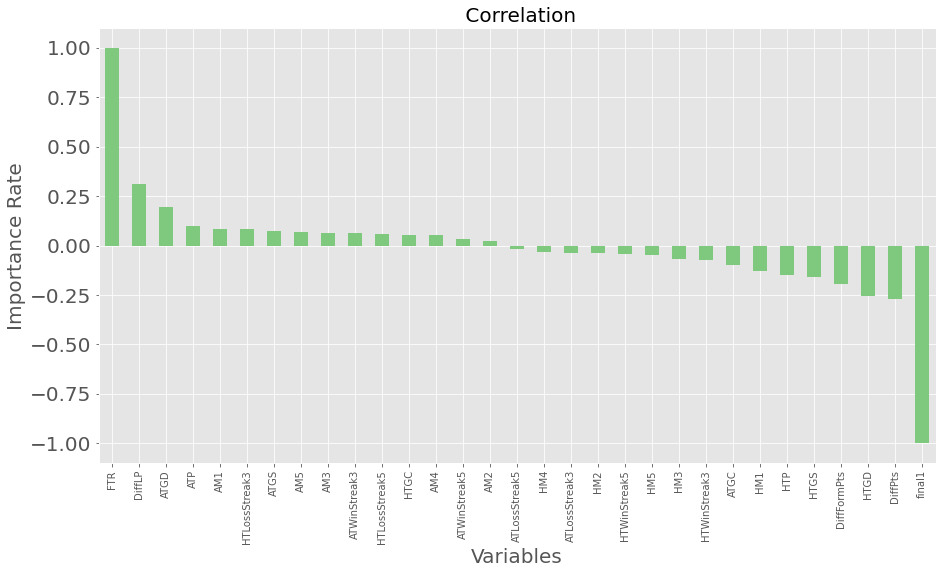

Most Positive Correlations: 
 FTR       1.000000
DiffLP    0.312098
ATGD      0.193031
ATP       0.097125
AM1       0.084886
Name: FTR, dtype: float64

Most Negative Correlations: 
 HTGS          -0.156900
DiffFormPts   -0.191770
HTGD          -0.255272
DiffPts       -0.268925
final1        -1.000000
Name: FTR, dtype: float64


In [3]:
#VISUALISATION
import matplotlib.pyplot as plt
#df_dum.corr()['is_promoted'].sort_values(ascending = False).plot(kind='bar')
import matplotlib.cm as cm
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
my_cmap = cm.get_cmap('Accent')

correlations = df.corr()['FTR'].sort_values(ascending = False)
correlations.plot(kind='bar', cmap=my_cmap)

plt.title(' Correlation',fontsize=20)
plt.xlabel('Variables', fontsize=20)
plt.ylabel('Importance Rate',fontsize=20)

plt.xticks(fontsize = 10) 
plt.yticks(fontsize = 20) 
plt.grid(True)
plt.show() 

print('Most Positive Correlations: \n', correlations.head(5))
print('\nMost Negative Correlations: \n', correlations.tail(5))

## Predict

### Split data train an test

In [4]:
# X = df[['B365H', 'B365D', 'B365A','HTP', 'ATP']]
# X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card']] # using top 5 highest features 
# X = df[['away_team_goal', 'B365H', 'away_possession','home_y_card','home_r_card', 'home_cross']]
X = df.drop(columns = ['FTR'])
y = df['FTR']

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
columns = X_train.values.shape[1]
columns

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (1995, 30)
Train labels shape:  (1995,)
Test data shape:  (665, 30)
Test labels shape:  (665,)


### DECISION TREE

In [6]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

modelDT = DT()
modelDT = modelDT.fit(X_train, y_train)
preds_DT = modelDT.predict(X_test)
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, preds_DT)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, preds_DT))

Accuracy of DecisionTreeClassifier on test set: 1.00
Logistic Regression Confusion Matrix 
 [[299   0]
 [  0 366]]


### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn import metrics

model_LR = LR(random_state=0)
# model_LR = model_LR.fit(X_train, y_train)
# pred_LR = model_LR.predict(X_test)

# print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
# print('Recall of Logistic Regression classifier on test set: {:.2f}'.format(metrics.recall_score(y_test, pred_LR)))
# print('Precision of Logistic Regression classifier on test set: {:.2f}'.format(metrics.precision_score(y_test, pred_LR)))
# print('F1-Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.f1_score(y_test, pred_LR)))
# print('AUC Score of Logistic Regression classifier on test set: {:.2f}'.format(metrics.roc_auc_score(y_test, pred_LR)))
# print('Logistic Regression Confusion Matrix = \n', metrics.confusion_matrix(y_test, pred_LR))

model_LR = model_LR.fit(X_train, y_train)
pred_LR = model_LR.predict(X_test)

print('Accuracy of Logistic Regression classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_LR)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_LR))

Accuracy of Logistic Regression classifier on test set: 1.00
Logistic Regression Confusion Matrix 
 [[299   0]
 [  0 366]]


### XGB Classifier

In [8]:
from xgboost import XGBClassifier

# get an instance from the clf
model_XGB = XGBClassifier()

# fit data
model_XGB.fit(X_train, y_train)

# predict unseen data
pred_XGB = model_XGB.predict(X_test)

print('Accuracy of XGBoost classifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, pred_XGB)))
print('XGBoost - Confusion Matrix \n', metrics.confusion_matrix(y_test, pred_XGB))

Accuracy of XGBoost classifier on test set: 1.00
XGBoost - Confusion Matrix 
 [[299   0]
 [  0 366]]


### KERAS

In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Activation, Flatten, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

# 41-75-3
# We first need to define the sequence of dependencies (the computational graph)
# x = Input(shape=(20,32))
x = Input(shape=(columns,))
# h = Conv2D(32, (7, 7), strides=(2, 2))(x)
# h = Activation('relu')(x)
h = Flatten()(x)
h = Dense(41)(h)
h = Dense(75)(h)
# for i in range(10):
#     h = Dense(75)(h)
h = Dropout(0.3)(h)
p = Activation('softmax')(h)

# Now that we have defined how to find p from x, we can create a 
# model simply by saying what is input and what is output
model = Model(inputs=x, outputs=p)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.00001), metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 30)                0         
_________________________________________________________________
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 41)                1271      
_________________________________________________________________
dense_1 (Dense)              (None, 75)                3150      
_________________________________________________________________
dropout (Dropout)            (None, 75)                0         
_________________________________________________________________
activation (Activatio

In [10]:
history = model.fit(X_train, y_train, batch_size=8, epochs=200, validation_split=0.04)

Train on 1915 samples, validate on 80 samples
Epoch 1/200
1915/1915 [==============================] - 1s 404us/sample - loss: 5.4950 - acc: 0.0219 - val_loss: 4.8052 - val_acc: 0.0250
Epoch 2/200
1915/1915 [==============================] - 1s 290us/sample - loss: 5.2236 - acc: 0.0491 - val_loss: 4.5145 - val_acc: 0.0500
Epoch 3/200
1915/1915 [==============================] - 1s 315us/sample - loss: 4.9310 - acc: 0.0872 - val_loss: 4.2455 - val_acc: 0.0875
Epoch 4/200
1915/1915 [==============================] - 1s 273us/sample - loss: 4.6425 - acc: 0.1222 - val_loss: 3.9854 - val_acc: 0.1875
Epoch 5/200
1915/1915 [==============================] - 1s 311us/sample - loss: 4.3953 - acc: 0.1781 - val_loss: 3.7424 - val_acc: 0.2250
Epoch 6/200
1915/1915 [==============================] - 1s 301us/sample - loss: 4.1796 - acc: 0.1932 - val_loss: 3.5170 - val_acc: 0.2875
Epoch 7/200
1915/1915 [==============================] - 1s 265us/sample - loss: 3.9591 - acc: 0.2282 - val_loss: 3.3028

1915/1915 [==============================] - 1s 305us/sample - loss: 1.5712 - acc: 0.6480 - val_loss: 0.7315 - val_acc: 0.7875
Epoch 60/200
1915/1915 [==============================] - 1s 282us/sample - loss: 1.6289 - acc: 0.6204 - val_loss: 0.7233 - val_acc: 0.8000
Epoch 61/200
1915/1915 [==============================] - 1s 296us/sample - loss: 1.5841 - acc: 0.6392 - val_loss: 0.7120 - val_acc: 0.8000
Epoch 62/200
1915/1915 [==============================] - 1s 305us/sample - loss: 1.5817 - acc: 0.6360 - val_loss: 0.7032 - val_acc: 0.8000
Epoch 63/200
1915/1915 [==============================] - 1s 308us/sample - loss: 1.5513 - acc: 0.6444 - val_loss: 0.6933 - val_acc: 0.8000
Epoch 64/200
1915/1915 [==============================] - 1s 313us/sample - loss: 1.4976 - acc: 0.6580 - val_loss: 0.6795 - val_acc: 0.8000
Epoch 65/200
1915/1915 [==============================] - 1s 311us/sample - loss: 1.5710 - acc: 0.6413 - val_loss: 0.6692 - val_acc: 0.8250
Epoch 66/200
1915/1915 [=========

1915/1915 [==============================] - 1s 301us/sample - loss: 1.3883 - acc: 0.7008 - val_loss: 0.3501 - val_acc: 0.9625
Epoch 118/200
1915/1915 [==============================] - 1s 287us/sample - loss: 1.3141 - acc: 0.7305 - val_loss: 0.3464 - val_acc: 0.9625
Epoch 119/200
1915/1915 [==============================] - 1s 262us/sample - loss: 1.2875 - acc: 0.7295 - val_loss: 0.3420 - val_acc: 0.9625
Epoch 120/200
1915/1915 [==============================] - 1s 269us/sample - loss: 1.2978 - acc: 0.7258 - val_loss: 0.3386 - val_acc: 0.9625
Epoch 121/200
1915/1915 [==============================] - 1s 285us/sample - loss: 1.2550 - acc: 0.7415 - val_loss: 0.3344 - val_acc: 0.9625
Epoch 122/200
1915/1915 [==============================] - 1s 358us/sample - loss: 1.3689 - acc: 0.7039 - val_loss: 0.3313 - val_acc: 0.9625
Epoch 123/200
1915/1915 [==============================] - 1s 304us/sample - loss: 1.3370 - acc: 0.7159 - val_loss: 0.3280 - val_acc: 0.9625
Epoch 124/200
1915/1915 [==

1915/1915 [==============================] - 1s 270us/sample - loss: 1.1796 - acc: 0.7373 - val_loss: 0.1749 - val_acc: 0.9875
Epoch 176/200
1915/1915 [==============================] - 1s 311us/sample - loss: 1.1828 - acc: 0.7368 - val_loss: 0.1725 - val_acc: 0.9875
Epoch 177/200
1915/1915 [==============================] - 1s 326us/sample - loss: 1.1956 - acc: 0.7305 - val_loss: 0.1703 - val_acc: 0.9875
Epoch 178/200
1915/1915 [==============================] - 1s 314us/sample - loss: 1.1143 - acc: 0.7525 - val_loss: 0.1678 - val_acc: 0.9875
Epoch 179/200
1915/1915 [==============================] - 1s 283us/sample - loss: 1.1918 - acc: 0.7415 - val_loss: 0.1655 - val_acc: 0.9875
Epoch 180/200
1915/1915 [==============================] - 1s 289us/sample - loss: 1.1633 - acc: 0.7530 - val_loss: 0.1630 - val_acc: 0.9875
Epoch 181/200
1915/1915 [==============================] - 1s 373us/sample - loss: 1.1907 - acc: 0.7321 - val_loss: 0.1609 - val_acc: 0.9875
Epoch 182/200
1915/1915 [==